<a href="https://colab.research.google.com/github/Alexa201228/ml_course_works/blob/main/Validation_and_data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Домашнее задание по теме "Основы валидации и предобработки"

Вспомним [задачу](https://colab.research.google.com/drive/1hEspRdszhAIJPePi5VmDCNmeSWluduE1?usp=sharing) по классификации опоссумов.

Тепербь в [данных](https://github.com/obulygin/content/blob/main/possum_data/possum_full.csv) есть ещё один признак (категориальный) - Pop, это популяция опоссума (Southern Victoria или другие регионы).

Задача перд вами стоит такая же, но теперь вам необходимо использовать:  
1) кодирование признаков;  
2) инструменты валидации;  
3) инструменты борьбы с дисбалансом.

Ответье на вопросы:
- как дополнительный категориальный признак влияет на прогнозную силу моделей?
- как различные инструменты борьбы с дисбалансом влияют на качество моделей на этих данных?

Оценки моделей необходимо делать при помощи кросс-валидации.
Финальный вариант предобработки и модели оценить на тестовой выборке.



In [ ]:
!wget https://raw.githubusercontent.com/obulygin/content/main/possum_data/possum_full.csv

--2023-08-27 09:42:27--  https://raw.githubusercontent.com/obulygin/content/main/possum_data/possum_full.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5484 (5.4K) [text/plain]
Saving to: ‘possum_full.csv’

possum_full.csv     100%[===================>]   5.36K  --.-KB/s    in 0s      

2023-08-27 09:42:27 (49.1 MB/s) - ‘possum_full.csv’ saved [5484/5484]



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Чтение и обработка данных

In [ ]:
df = pd.read_csv('possum_full.csv')
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [ ]:
df = df.drop(["case","site"], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pop       104 non-null    object 
 1   sex       104 non-null    object 
 2   age       102 non-null    float64
 3   hdlngth   104 non-null    float64
 4   skullw    104 non-null    float64
 5   totlngth  104 non-null    float64
 6   taill     104 non-null    float64
 7   footlgth  103 non-null    float64
 8   earconch  104 non-null    float64
 9   eye       104 non-null    float64
 10  chest     104 non-null    float64
 11  belly     104 non-null    float64
dtypes: float64(10), object(2)
memory usage: 9.9+ KB


In [ ]:
df.describe()

,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,102.000000,104.000000,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000
mean,3.833333,92.602885,56.883654,87.088462,37.009615,68.459223,48.130769,15.046154,27.000000,32.586538
std,1.909244,3.573349,3.113426,4.310549,1.959518,4.395306,4.109380,1.050374,2.045597,2.761949
min,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,2.250000,90.675000,54.975000,84.000000,35.875000,64.600000,44.800000,14.400000,25.500000,31.000000
50%,3.000000,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000
max,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


In [ ]:
# Посмотрим на количество пропусков
df.isna().sum()

Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [ ]:
# Заполним пропуски в столбце age
df["age"] = df["age"].fillna(df.groupby("sex")["age"].transform("mean"))
df["footlgth"] = df["footlgth"].fillna(df.groupby("sex")["footlgth"].transform("mean"))

In [ ]:
# Посмотрим на уникальные значения в столбце Pop

df['Pop'].unique()

array(['Vic', 'other'], dtype=object)

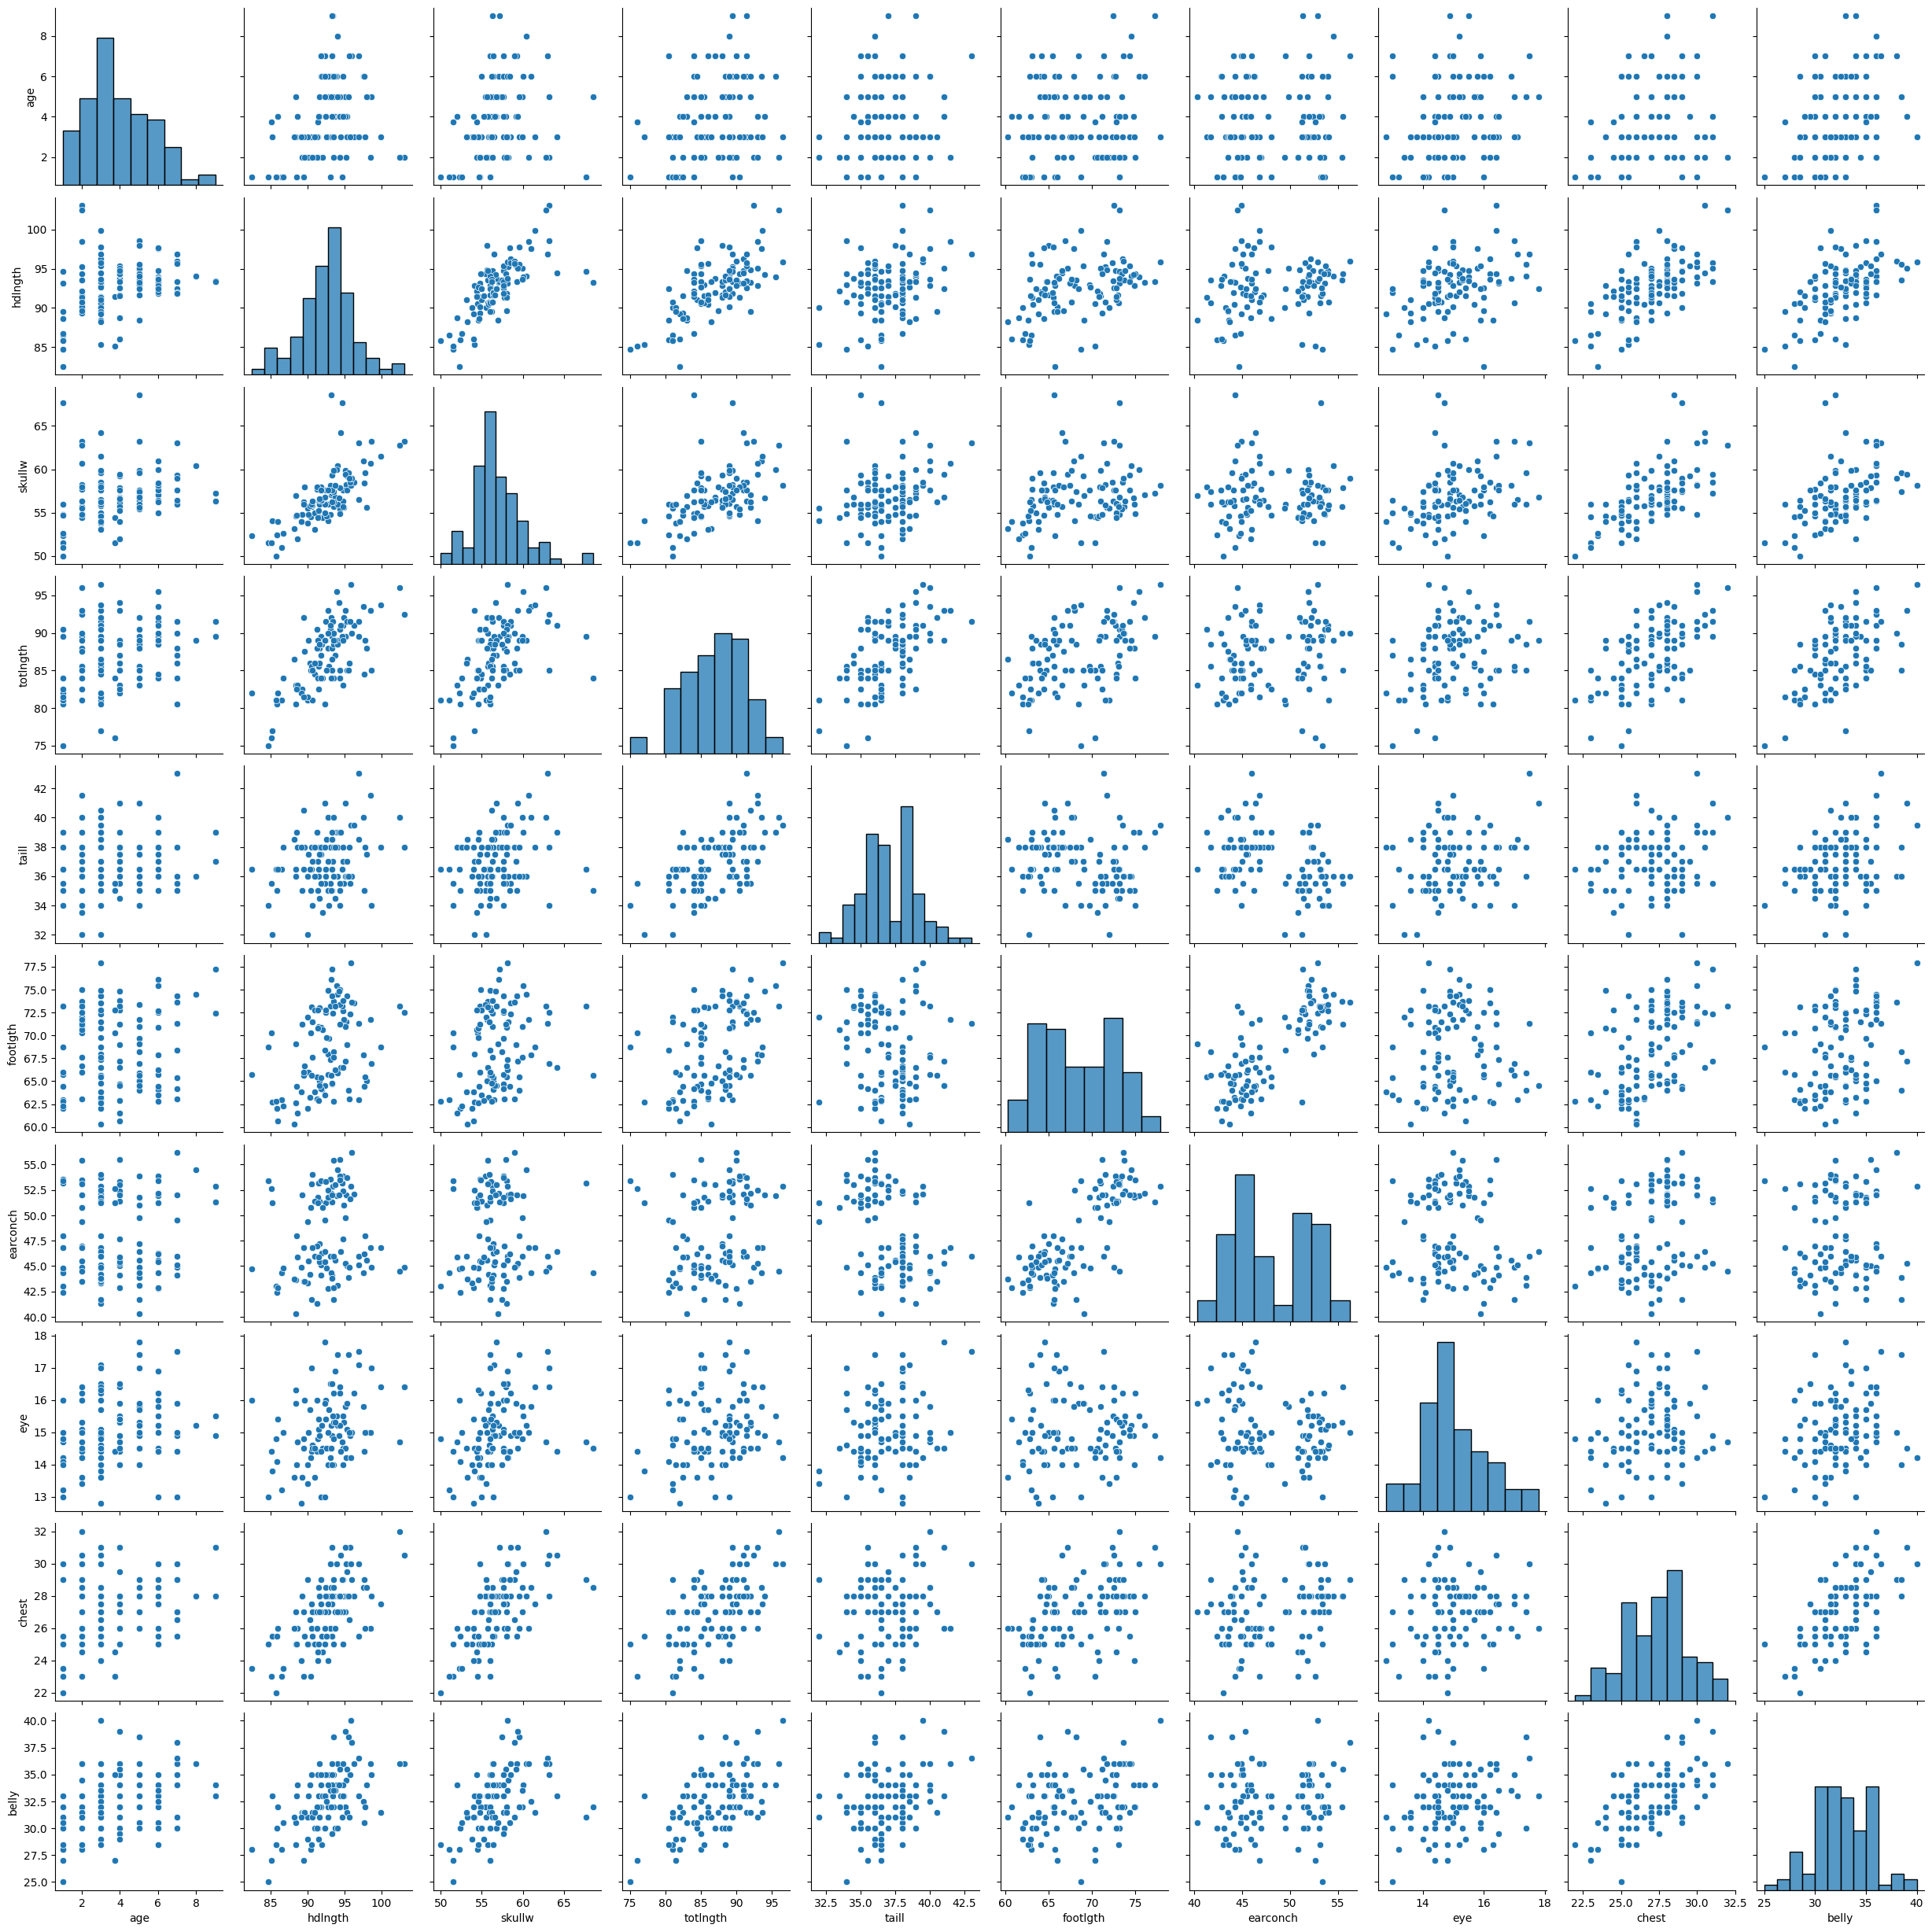

In [ ]:
# Построим скатерплоты для определения взаимосвязи признаков

sns.pairplot(df)

<ipython-input-10-3757e31b2b3d>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(temp_df.corr(), annot=True)


<Axes: >

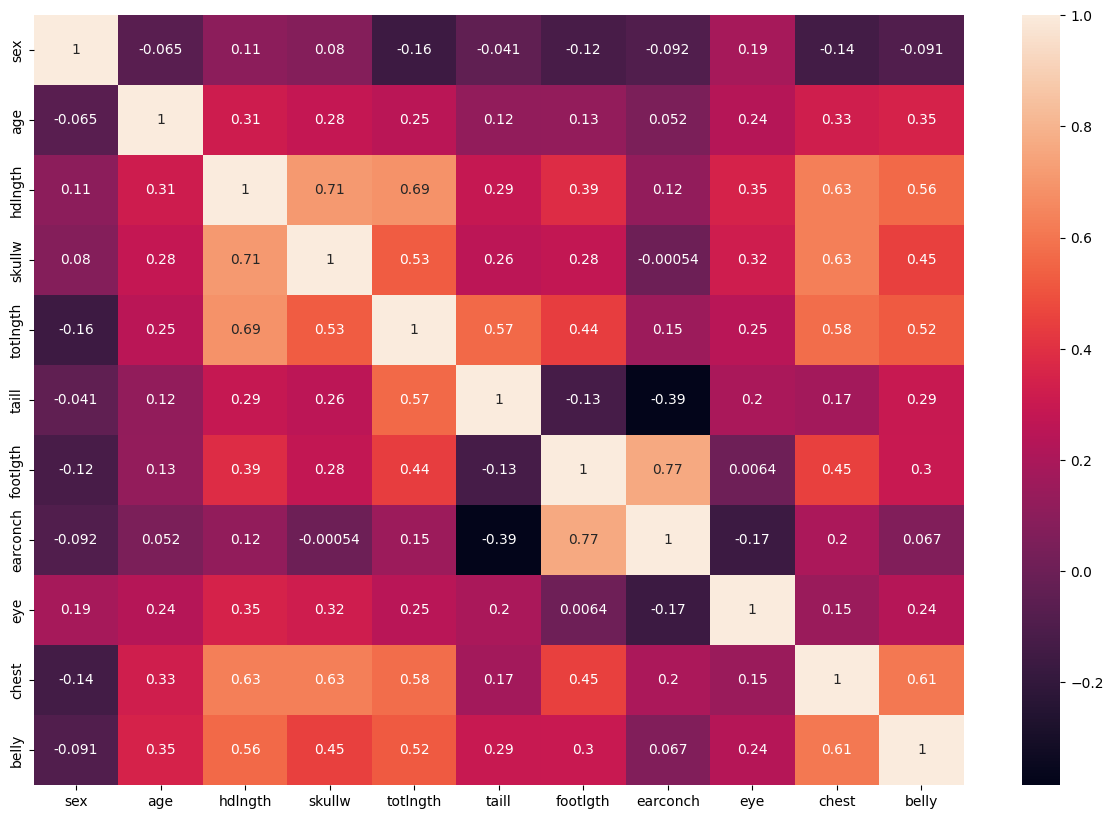

In [ ]:
# Построим heatmap для определения взаимосвязи признаков
# Для построения матрицы необходимо закодировать целевой признак, так как он является категориальным

from sklearn.preprocessing import LabelEncoder

lb_encoder = LabelEncoder()
temp_df = df.copy()
temp_df['sex'] = lb_encoder.fit_transform(temp_df['sex'])

fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(temp_df.corr(), annot=True)

### Определение дисбаланса датасета

<Axes: xlabel='sex', ylabel='count'>

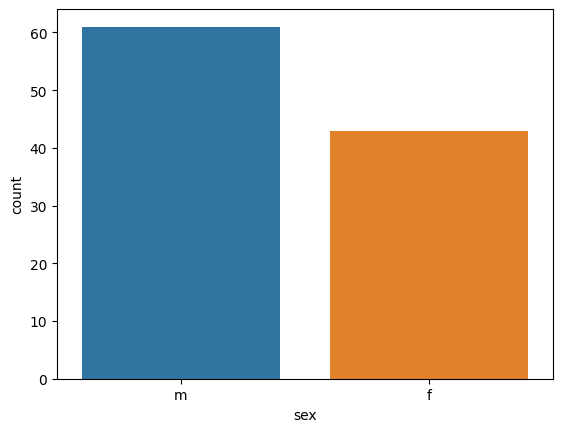

In [ ]:
# Подсчет количества особей разного пола

sns.countplot(x='sex', data=df)

In [ ]:
print(f"Male possums count: {df[df['sex'] == 'm'].value_counts().sum() / df['sex'].value_counts().sum()}")
print(f"Female possums count: {df[df['sex'] == 'f'].value_counts().sum() / df['sex'].value_counts().sum()}")

Male possums count: 0.5865384615384616
Female possums count: 0.41346153846153844


В данном случае наблюдается дисбаланс в ~17% между классами. Данный дисбаланс не является слишком большим, тем не менее, мы можем воспользоваться стратификацией для устранения дисбаланса.

### Устранение дисбаланса классов

In [ ]:
# Воспользуемся встроенным параметром stratify при разбивке на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(['sex'], axis=1), df['sex'], test_size=0.3, random_state=42, stratify=df['sex'])

In [ ]:
# Посмотрим на выборку после стратификации

print('Тренировочная выборка:\n', y_train.value_counts(normalize=True), sep='')
print('Валидационная:\n', y_test.value_counts(normalize=True), sep='')

Тренировочная выборка:
m    0.583333
f    0.416667
Name: sex, dtype: float64
Валидационная:
m    0.59375
f    0.40625
Name: sex, dtype: float64


### Кодирование категориальных признаков

#### One-hot-encoding с использованием get_dummies

In [ ]:
# Так как в датасете присутствует категориальный признак Pop, его необходимо закодировать
# Для этого воспольземся методом get_dummies с флагом drop_first

X_train_encoded = pd.get_dummies(X_train, columns=["Pop"], drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=["Pop"], drop_first=True)

X_train_encoded

,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,Pop_other
15,4.0,91.6,56.0,86.0,34.5,73.0,51.4,14.4,28.0,32.0,0
71,1.0,85.9,52.4,80.5,35.0,62.0,42.4,14.1,25.5,30.0,1
62,6.0,92.0,56.4,88.5,38.0,64.1,46.3,15.2,25.5,28.5,1
67,5.0,94.1,56.0,88.5,38.0,65.9,43.1,17.4,27.0,30.0,1
19,4.0,94.8,56.3,89.0,38.0,73.8,52.4,15.5,27.0,36.0,0
...,...,...,...,...,...,...,...,...,...,...,...
5,1.0,93.1,54.8,90.5,35.5,73.2,53.6,14.2,30.0,32.0,0
64,5.0,93.5,57.4,88.5,38.0,68.2,41.7,14.0,29.0,38.5,1
97,5.0,93.2,68.6,84.0,35.0,65.6,44.3,14.5,28.5,32.0,1
69,7.0,91.9,56.4,87.0,38.0,65.4,44.1,13.0,27.0,34.0,1


### Построение модели с использованием инструментов валидации

#### Построение baseline модели с KFold

In [ ]:
# Используем LabelEncoder для кодирования целевого признака

y_train_encoded = lb_encoder.fit_transform(y_train)
y_test_encoded = lb_encoder.fit_transform(y_test)

y_train_encoded

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1])

In [ ]:
# В качестве baseline модели будем использовать логистическую регрессию

from sklearn.linear_model import LogisticRegression
from sklearn import model_selection


log_model = LogisticRegression(random_state=42, max_iter=1000, class_weight="balanced")

kf = model_selection.StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

cv_results = model_selection.cross_validate(
    estimator=log_model,
    X=X_train_encoded,
    y=y_train_encoded,
    cv=kf,
    scoring='f1',
    n_jobs=-1,
)



##### Проверка качества модели

In [ ]:
print(f"Качество на валидационной выборке: {np.mean(cv_results['test_score']):.3f}")

Качество на валидационной выборке: 0.576


Модель логистической регрессии показала неудовлетворительное качество.

#### Построение модели с RandomForest

In [ ]:
from sklearn import ensemble

rf_classifier = ensemble.RandomForestClassifier(
    n_estimators=500,
    criterion="entropy",
    max_depth=6,
    max_features="sqrt",
    random_state=42,
    class_weight="balanced",
)

kf_rf_model = model_selection.StratifiedKFold(n_splits=10)


cv_results = model_selection.cross_validate(
    estimator=rf_classifier,
    X=X_train_encoded,
    y=y_train_encoded,
    cv=kf_rf_model,
    scoring='f1',
    return_train_score=True,
)

##### Проверка качества модели

In [ ]:
print(f"Качество на валидационной выборке: {np.mean(cv_results['test_score']):.3f}")

Качество на валидационной выборке: 0.749


### Оценка моделей на тестовой выборке

#### Оценка модели логистической регрессии

In [ ]:
from sklearn import metrics

log_model.fit(X_train_encoded, y_train_encoded)
log_model_pred = log_model.predict(X_test_encoded)
print(metrics.classification_report(y_test_encoded, log_model_pred))

              precision    recall  f1-score   support

           0       0.42      0.62      0.50        13
           1       0.62      0.42      0.50        19

    accuracy                           0.50        32
   macro avg       0.52      0.52      0.50        32
weighted avg       0.54      0.50      0.50        32



#### Оценка модели RandomForest

In [ ]:
rf_classifier.fit(X_train_encoded, y_train_encoded)
rf_classifier_pred = rf_classifier.predict(X_test_encoded)
print(metrics.classification_report(y_test_encoded, rf_classifier_pred))

              precision    recall  f1-score   support

           0       0.42      0.38      0.40        13
           1       0.60      0.63      0.62        19

    accuracy                           0.53        32
   macro avg       0.51      0.51      0.51        32
weighted avg       0.53      0.53      0.53        32



### Вывод

При добавлении нового категориального признака качество моделей в обоих случаях снизилось. При этом модель RandomForest показала лучшие результаты чем логистическая регрессия.

Устранение дисбаланса в обоих случаях улучшило качетво моделей